# Pandas user guide from pydata.org

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [2]:
import numpy as np
import pandas as pd

In [3]:
#creating a Series by passing a list of values, letting pandas create a default integer index:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
#Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.172312,0.106676,-1.049064,0.160119
2013-01-02,-0.241918,0.939371,-0.061873,1.914754
2013-01-03,0.163260,0.807870,0.471507,-0.170539
2013-01-04,-0.070193,0.594396,1.175613,-1.164397
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270
2013-01-06,-0.143361,-0.565268,1.386426,0.555486


In [6]:
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
        }
    )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
#The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [8]:
#If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
#df2.<TAB>  # noqa: E225, E999


### Viewing data


In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.172312,0.106676,-1.049064,0.160119
2013-01-02,-0.241918,0.939371,-0.061873,1.914754
2013-01-03,0.163260,0.807870,0.471507,-0.170539
2013-01-04,-0.070193,0.594396,1.175613,-1.164397
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.070193,0.594396,1.175613,-1.164397
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270
2013-01-06,-0.143361,-0.565268,1.386426,0.555486


In [11]:
#Display the index, columns:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
#For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.
#DataFrame.to_numpy() does not include the index or column labels in the output.
df.to_numpy()

array([[-0.17231171,  0.1066756 , -1.04906391,  0.16011895],
       [-0.24191792,  0.93937135, -0.06187256,  1.9147542 ],
       [ 0.16325966,  0.80787017,  0.47150684, -0.1705392 ],
       [-0.07019272,  0.59439649,  1.17561313, -1.16439723],
       [-0.17599189, -1.88575468, -0.35736389,  0.48526982],
       [-0.14336098, -0.56526825,  1.38642575,  0.55548646]])

In [14]:

#For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [15]:
#describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.106753,-0.000452,0.260874,0.296782
std,0.143489,1.074743,0.932770,1.009198
min,-0.241918,-1.885755,-1.049064,-1.164397
25%,-0.175072,-0.397282,-0.283491,-0.087875
50%,-0.157836,0.350536,0.204817,0.322694
75%,-0.088485,0.754502,0.999587,0.537932
max,0.163260,0.939371,1.386426,1.914754


In [16]:
#Transposing your data:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.172312,-0.241918,0.163260,-0.070193,-0.175992,-0.143361
B,0.106676,0.939371,0.807870,0.594396,-1.885755,-0.565268
C,-1.049064,-0.061873,0.471507,1.175613,-0.357364,1.386426
D,0.160119,1.914754,-0.170539,-1.164397,0.485270,0.555486


In [17]:
# Sorting by an axis:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.160119,-1.049064,0.106676,-0.172312
2013-01-02,1.914754,-0.061873,0.939371,-0.241918
2013-01-03,-0.170539,0.471507,0.807870,0.163260
2013-01-04,-1.164397,1.175613,0.594396,-0.070193
2013-01-05,0.485270,-0.357364,-1.885755,-0.175992
2013-01-06,0.555486,1.386426,-0.565268,-0.143361


In [18]:
#Sorting by values:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270
2013-01-06,-0.143361,-0.565268,1.386426,0.555486
2013-01-01,-0.172312,0.106676,-1.049064,0.160119
2013-01-04,-0.070193,0.594396,1.175613,-1.164397
2013-01-03,0.163260,0.807870,0.471507,-0.170539
2013-01-02,-0.241918,0.939371,-0.061873,1.914754


## Selection
TODO: to follow up with .at, .iat, .loc and .iloc.

### Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [19]:
df["A"]

2013-01-01   -0.172312
2013-01-02   -0.241918
2013-01-03    0.163260
2013-01-04   -0.070193
2013-01-05   -0.175992
2013-01-06   -0.143361
Freq: D, Name: A, dtype: float64

In [20]:
df.A

2013-01-01   -0.172312
2013-01-02   -0.241918
2013-01-03    0.163260
2013-01-04   -0.070193
2013-01-05   -0.175992
2013-01-06   -0.143361
Freq: D, Name: A, dtype: float64

In [21]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,-0.172312,0.106676,-1.049064,0.160119
2013-01-02,-0.241918,0.939371,-0.061873,1.914754
2013-01-03,0.163260,0.807870,0.471507,-0.170539


In [22]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.241918,0.939371,-0.061873,1.914754
2013-01-03,0.163260,0.807870,0.471507,-0.170539
2013-01-04,-0.070193,0.594396,1.175613,-1.164397


### Selection by label
See more in Selection by Label.

For getting a cross section using a label:

In [23]:
df.loc[dates[0]]

A   -0.172312
B    0.106676
C   -1.049064
D    0.160119
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.172312,0.106676
2013-01-02,-0.241918,0.939371
2013-01-03,0.163260,0.807870
2013-01-04,-0.070193,0.594396
2013-01-05,-0.175992,-1.885755
2013-01-06,-0.143361,-0.565268


In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.241918,0.939371
2013-01-03,0.163260,0.807870
2013-01-04,-0.070193,0.594396


In [26]:
df.loc[["20130102","20130104"], ["A", "B"]]

,A,B
2013-01-02,-0.241918,0.939371
2013-01-04,-0.070193,0.594396


In [28]:
#Reduction in the dimensions of the returned object:
df.loc["20130102", ["A", "B"]]

A   -0.241918
B    0.939371
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
#For getting a scalar value:
df.loc[dates[0], "A"]


-0.17231170695347298

In [31]:
df.loc["20130101", "A"]

-0.17231170695347298

In [32]:
# For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], "A"]

-0.17231170695347298

### Selection by position
See more in Selection by Position.

Select via the position of the passed integers:

In [33]:
df.iloc[3]

A   -0.070193
B    0.594396
C    1.175613
D   -1.164397
Name: 2013-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.070193,0.594396
2013-01-05,-0.175992,-1.885755


In [35]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.241918,-0.061873
2013-01-03,0.163260,0.471507
2013-01-05,-0.175992,-0.357364


In [36]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.241918,0.939371,-0.061873,1.914754
2013-01-03,0.163260,0.807870,0.471507,-0.170539


In [38]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.106676,-1.049064
2013-01-02,0.939371,-0.061873
2013-01-03,0.807870,0.471507
2013-01-04,0.594396,1.175613
2013-01-05,-1.885755,-0.357364
2013-01-06,-0.565268,1.386426


In [39]:
#For getting a value explicitly:
df.iloc[1, 1]

0.939371354947053

In [40]:
df.iat[1, 1]

0.939371354947053

### Boolean indexing
Using a single column’s values to select data.

In [41]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.16326,0.80787,0.471507,-0.170539


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.106676,NaN,0.160119
2013-01-02,NaN,0.939371,NaN,1.914754
2013-01-03,0.16326,0.807870,0.471507,NaN
2013-01-04,NaN,0.594396,1.175613,NaN
2013-01-05,NaN,NaN,NaN,0.485270
2013-01-06,NaN,NaN,1.386426,0.555486


In [43]:
df2 = df.copy()

In [44]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [45]:
df2

,A,B,C,D,E
2013-01-01,-0.172312,0.106676,-1.049064,0.160119,one
2013-01-02,-0.241918,0.939371,-0.061873,1.914754,one
2013-01-03,0.163260,0.807870,0.471507,-0.170539,two
2013-01-04,-0.070193,0.594396,1.175613,-1.164397,three
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270,four
2013-01-06,-0.143361,-0.565268,1.386426,0.555486,three


In [46]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.163260,0.807870,0.471507,-0.170539,two
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270,four


### Setting
Setting a new column automatically aligns the data by the indexes.

In [53]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"]=s1

In [54]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.106676,-1.049064,0.160119,NaN
2013-01-02,-0.241918,0.939371,-0.061873,1.914754,1.0
2013-01-03,0.163260,0.807870,0.471507,-0.170539,2.0
2013-01-04,-0.070193,0.594396,1.175613,-1.164397,3.0
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270,4.0
2013-01-06,-0.143361,-0.565268,1.386426,0.555486,5.0


In [55]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.049064,0.160119,NaN
2013-01-02,-0.241918,0.939371,-0.061873,1.914754,1.0
2013-01-03,0.163260,0.807870,0.471507,-0.170539,2.0
2013-01-04,-0.070193,0.594396,1.175613,-1.164397,3.0
2013-01-05,-0.175992,-1.885755,-0.357364,0.485270,4.0
2013-01-06,-0.143361,-0.565268,1.386426,0.555486,5.0


In [57]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.049064,5,NaN
2013-01-02,-0.241918,0.939371,-0.061873,5,1.0
2013-01-03,0.163260,0.807870,0.471507,5,2.0
2013-01-04,-0.070193,0.594396,1.175613,5,3.0
2013-01-05,-0.175992,-1.885755,-0.357364,5,4.0
2013-01-06,-0.143361,-0.565268,1.386426,5,5.0


In [60]:
df2 = df.copy()
df2[df2>0] =-df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.049064,-5,NaN
2013-01-02,-0.241918,-0.939371,-0.061873,-5,-1.0
2013-01-03,-0.163260,-0.807870,-0.471507,-5,-2.0
2013-01-04,-0.070193,-0.594396,-1.175613,-5,-3.0
2013-01-05,-0.175992,-1.885755,-0.357364,-5,-4.0
2013-01-06,-0.143361,-0.565268,-1.386426,-5,-5.0


### Missing data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [61]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"]=1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.049064,5,NaN,1.0
2013-01-02,-0.241918,0.939371,-0.061873,5,1.0,1.0
2013-01-03,0.163260,0.807870,0.471507,5,2.0,NaN
2013-01-04,-0.070193,0.594396,1.175613,5,3.0,NaN


In [62]:
#To drop any rows that have missing data.
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.241918,0.939371,-0.061873,5,1.0,1.0


In [64]:
#Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.049064,5,5.0,1.0
2013-01-02,-0.241918,0.939371,-0.061873,5,1.0,1.0
2013-01-03,0.163260,0.807870,0.471507,5,2.0,5.0
2013-01-04,-0.070193,0.594396,1.175613,5,3.0,5.0


In [65]:
#to get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.
### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [67]:
df.mean()

A   -0.078034
B   -0.018231
C    0.260874
D    5.000000
F    3.000000
dtype: float64

In [68]:
df.sum()

A    -0.468204
B    -0.109385
C     1.565245
D    30.000000
F    15.000000
dtype: float64

In [69]:
#Same operation on the other axis:
df.sum(1)

2013-01-01     3.950936
2013-01-02     6.635581
2013-01-03     8.442637
2013-01-04     9.699817
2013-01-05     6.580890
2013-01-06    10.677797
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [71]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [72]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.836740,-0.192130,-0.528493,4.0,1.0
2013-01-04,-3.070193,-2.405604,-1.824387,2.0,0.0
2013-01-05,-5.175992,-6.885755,-5.357364,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:

In [74]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.049064,5,NaN
2013-01-02,-0.241918,0.939371,-1.110936,10,1.0
2013-01-03,-0.078658,1.747242,-0.639430,15,3.0
2013-01-04,-0.148851,2.341638,0.536183,20,6.0
2013-01-05,-0.324843,0.455883,0.178820,25,10.0
2013-01-06,-0.468204,-0.109385,1.565245,30,15.0


In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    3
3    3
4    0
5    0
6    1
7    3
8    1
9    4
dtype: int32

In [76]:
s.value_counts()

0    3
1    3
3    3
4    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [77]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge
Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [79]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.188612,0.224276,-0.983104,0.114477
1,0.714129,-0.353275,-0.836743,-0.918826
2,-0.765251,0.830999,-0.175258,-0.885952
3,-0.308558,2.215209,-0.523789,-0.399192
4,-0.500638,0.971653,-0.062292,-0.883639
5,-0.458643,1.931934,-0.448850,-1.099887
6,1.313733,-0.649094,-0.236568,-1.574632
7,-0.348717,1.979197,-1.063699,0.199092
8,1.582302,2.470399,0.352927,-0.022839
9,2.435970,1.400971,-1.713559,-0.089265


In [81]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.188612  0.224276 -0.983104  0.114477
 1  0.714129 -0.353275 -0.836743 -0.918826
 2 -0.765251  0.830999 -0.175258 -0.885952,
           0         1         2         3
 3 -0.308558  2.215209 -0.523789 -0.399192
 4 -0.500638  0.971653 -0.062292 -0.883639
 5 -0.458643  1.931934 -0.448850 -1.099887
 6  1.313733 -0.649094 -0.236568 -1.574632,
           0         1         2         3
 7 -0.348717  1.979197 -1.063699  0.199092
 8  1.582302  2.470399  0.352927 -0.022839
 9  2.435970  1.400971 -1.713559 -0.089265]

In [82]:
pd.concat(pieces)

,0,1,2,3
0,-0.188612,0.224276,-0.983104,0.114477
1,0.714129,-0.353275,-0.836743,-0.918826
2,-0.765251,0.830999,-0.175258,-0.885952
3,-0.308558,2.215209,-0.523789,-0.399192
4,-0.500638,0.971653,-0.062292,-0.883639
5,-0.458643,1.931934,-0.448850,-1.099887
6,1.313733,-0.649094,-0.236568,-1.574632
7,-0.348717,1.979197,-1.063699,0.199092
8,1.582302,2.470399,0.352927,-0.022839
9,2.435970,1.400971,-1.713559,-0.089265


Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

### Join
SQL style merges. See the Database style joining section.

In [83]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,foo,2


In [85]:
right

,key,rval
0,foo,4
1,foo,5


In [86]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [87]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping
By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [89]:
df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        }
    )
df

,A,B,C,D
0,foo,one,0.005245,-0.444032
1,bar,one,-0.075208,-0.733631
2,foo,two,1.268875,0.553354
3,bar,three,0.247731,0.098357
4,foo,two,-0.967580,-0.460617
5,bar,two,1.366626,-2.386412
6,foo,one,0.185774,-0.122025
7,foo,three,-0.948251,0.118021


In [92]:
#Grouping and then applying the sum() function to the resulting groups.
df.groupby("A").sum()

,C,D
A,,
bar,1.539149,-3.021686
foo,-0.455939,-0.355299


,C,D
A,,
bar,1.539149,-3.021686
foo,-0.455939,-0.355299


In [93]:
#Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.075208 -0.733631
    three  0.247731  0.098357
    two    1.366626 -2.386412
foo one    0.191018 -0.566057
    three -0.948251  0.118021
    two    0.301294  0.092737

### Reshaping
See the sections on Hierarchical Indexing and Reshaping.

Stack

In [96]:
tuples = list(
        zip(
            *[
                ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                ["one", "two", "one", "two", "one", "two", "one", "two"],
            ]
        )
    )
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.803915  1.399958
      two     1.793138 -1.086522
baz   one    -0.835021 -1.111885
      two     0.209573 -0.378092

In [100]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.803915
               B    1.399958
       two     A    1.793138
               B   -1.086522
baz    one     A   -0.835021
               B   -1.111885
       two     A    0.209573
               B   -0.378092
dtype: float64

In [101]:
stacked.unstack()

A         B
first second                    
bar   one    -0.803915  1.399958
      two     1.793138 -1.086522
baz   one    -0.835021 -1.111885
      two     0.209573 -0.378092

In [102]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.803915  1.793138
      B  1.399958 -1.086522
baz   A -0.835021  0.209573
      B -1.111885 -0.378092

### Pivot tables
See the section on Pivot Tables.

In [103]:
In [101]: df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )
   .....: 

In [104]:
df

,A,B,C,D,E
0,one,A,foo,-0.484105,0.010567
1,one,B,foo,-0.223189,-0.071655
2,two,C,foo,-1.098106,0.147239
3,three,A,bar,-1.164235,0.412201
4,one,B,bar,0.412426,-0.259540
5,one,C,bar,1.645475,-0.983402
6,two,A,foo,-0.948001,-0.260957
7,three,B,foo,0.666522,0.526168
8,one,C,foo,-0.893174,0.572016
9,one,A,bar,0.645754,-1.062679


In [105]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.645754 -0.484105
      B  0.412426 -0.223189
      C  1.645475 -0.893174
three A -1.164235       NaN
      B       NaN  0.666522
      C -0.758290       NaN
two   A       NaN -0.948001
      B  0.305795       NaN
      C       NaN -1.098106

### Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [109]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    26082
Freq: 5T, dtype: int32

In [111]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts


2012-03-06   -0.413274
2012-03-07   -0.727286
2012-03-08    1.074847
2012-03-09    0.591770
2012-03-10    0.536831
Freq: D, dtype: float64

In [113]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.413274
2012-03-07 00:00:00+00:00   -0.727286
2012-03-08 00:00:00+00:00    1.074847
2012-03-09 00:00:00+00:00    0.591770
2012-03-10 00:00:00+00:00    0.536831
Freq: D, dtype: float64

In [114]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.413274
2012-03-06 19:00:00-05:00   -0.727286
2012-03-07 19:00:00-05:00    1.074847
2012-03-08 19:00:00-05:00    0.591770
2012-03-09 19:00:00-05:00    0.536831
Freq: D, dtype: float64

In [116]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.059675
2012-02-29   -0.059888
2012-03-31    0.900012
2012-04-30    1.721833
2012-05-31    0.016447
Freq: M, dtype: float64

In [118]:
ps = ts.to_period()
ps

2012-01   -1.059675
2012-02   -0.059888
2012-03    0.900012
2012-04    1.721833
2012-05    0.016447
Freq: M, dtype: float64

In [119]:
ps.to_timestamp()

2012-01-01   -1.059675
2012-02-01   -0.059888
2012-03-01    0.900012
2012-04-01    1.721833
2012-05-01    0.016447
Freq: MS, dtype: float64

In [124]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    1.939233
1990-06-01 09:00   -0.490568
1990-09-01 09:00    2.017958
1990-12-01 09:00   -0.414768
1991-03-01 09:00   -0.830761
Freq: H, dtype: float64

### Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [125]:
In [123]: df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )
   .....: 

In [126]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [127]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [128]:
 df["grade"].cat.categories = ["very good", "good", "very bad"]

In [129]:
In [127]: df["grade"] = df["grade"].cat.set_categories(
   .....:     ["very bad", "bad", "medium", "good", "very good"]
   .....: )
   .....: 
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [130]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [131]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting
See the Plotting docs.

We use the standard convention for referencing the matplotlib API:

In [152]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

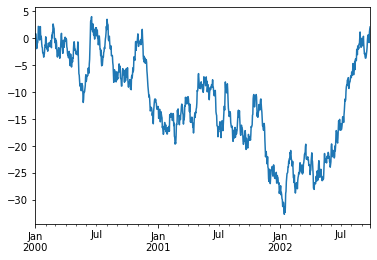

In [153]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

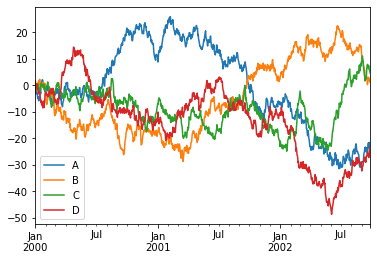

In [154]:
In [136]: df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )
   .....: 

In [137]: df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

### Getting data in/out
CSV
Writing to a csv file.


In [155]:
df.to_csv("foo.csv")

In [139]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.172277,0.033779,-0.524516,1.713353
1,2000-01-02,-0.667030,-0.671213,-0.741997,-0.967502
2,2000-01-03,-2.496527,0.216939,-0.741485,-0.497981
3,2000-01-04,-2.293989,0.767254,0.053801,-0.546148
4,2000-01-05,-1.509577,-1.217887,-0.148270,0.066240
...,...,...,...,...,...
995,2002-09-22,10.420863,-18.997897,-8.053123,56.833230
996,2002-09-23,11.673538,-19.718411,-8.453935,55.892469
997,2002-09-24,11.517467,-20.337573,-8.791199,56.828748
998,2002-09-25,11.468727,-21.210854,-8.941923,55.280597


## Three methods for addressing Padas DataFrames
from https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte


## Selecting multiple columns in a Pandas dataframe
https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe/36955053#36955053

In [181]:
df1=pd.DataFrame(
    {
        'a':[2,3],
        'b':[3,4],
        'c':[4,5]
    }, index=[1,2]
)
df1

,a,b,c
1,2,3,4
2,3,4,5


In [193]:
df1[['a','c']]

,a,c
1,2,4
2,3,5


## Python: Pandas Series - Why use loc?
https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc/38886211#38886211

In [197]:
#df can have boolean-valud column labels
df = pd.DataFrame({True:[1,2,3],False:[3,4,5]}); df

,True,False
0,1,3
1,2,4
2,3,5


In [200]:
df2 = pd.DataFrame({'A':[1,2,3],'B':[3,4,5]}); df2

,A,B
0,1,3
1,2,4
2,3,5


In [201]:
df2[['B']]

,B
0,3
1,4
2,5


In [202]:
 df2.loc[[True,False,True], 'B']

0    3
2    5
Name: B, dtype: int64